In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import datetime as datetime
import calendar

In [ ]:
pip install category_encoders

In [ ]:
from sklearn.metrics import log_loss 
from category_encoders.target_encoder import TargetEncoder 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from xgboost import XGBClassifier

# DATASET

In [ ]:
df_train = pd.read_csv('Train_TP2_Datos_2020-2C.csv')
df_test = pd.read_csv('Test_TP2_Datos_2020-2C.csv')

In [ ]:
train = df_train[(df_train.Stage == 'Closed Won') | (df_train.Stage == 'Closed Lost')]
cambio_binario = {'Closed Lost' : 0, 'Closed Won' : 1}
train['Stage'] = train['Stage'].map(cambio_binario)
train['Opportunity_Created_Date'] = pd.to_datetime(train['Opportunity_Created_Date'])
train['años'] = train['Opportunity_Created_Date'].dt.year
train['meses'] = train['Opportunity_Created_Date'].dt.month
train.sort_values(['años', 'meses'], ascending=True, inplace=True)
train.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses
16104,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.5,EUR,662287.5,0,Prod_Category_A_None,2013,11
16105,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.0,USD,9803430.0,0,Prod_Category_A_None,2014,3
16106,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.6,USD,341863.2,0,Prod_Category_A_None,2014,3
16107,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.6,USD,341863.2,0,Prod_Category_A_None,2014,3
16108,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.0,USD,31410780.0,1,Prod_Category_A_None,2014,5
16109,20516,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_151,Product_Name_273,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,3,USD,1886852.0,USD,31410780.0,1,Prod_Category_A_None,2014,5
16110,18562,APAC,India,1,0,0,0,0,Bureaucratic_Code_5,7/28/2013,Source_11,Pakistan,Account_Name_1711,Opportunity_Name_10475,12373,None,Person_Name_49,Person_Name_49,Account_Type_2,Opportunity_Type_3,Non Binding,Delivery_Terms_6,2014-05-19,None,None,None,None,None,None,NaT,3/31/2016,3/30/2016,Person_Name_49,Product

In [ ]:
train.head(7)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses
16104,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.5,EUR,662287.5,0,Prod_Category_A_None,2013,11
16105,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.0,USD,9803430.0,0,Prod_Category_A_None,2014,3
16106,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.6,USD,341863.2,0,Prod_Category_A_None,2014,3
16107,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.6,USD,341863.2,0,Prod_Category_A_None,2014,3
16108,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.0,USD,31410780.0,1,Prod_Category_A_None,2014,5
16109,20516,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_151,Product_Name_273,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,3,USD,1886852.0,USD,31410780.0,1,Prod_Category_A_None,2014,5
16110,18562,APAC,India,1,0,0,0,0,Bureaucratic_Code_5,7/28/2013,Source_11,Pakistan,Account_Name_1711,Opportunity_Name_10475,12373,None,Person_Name_49,Person_Name_49,Account_Type_2,Opportunity_Type_3,Non Binding,Delivery_Terms_6,2014-05-19,None,None,None,None,None,None,NaT,3/31/2016,3/30/2016,Person_Name_49,Product

In [ ]:
cambio_binario = {'AUD' : 0.77, 'EUR' : 1.21, 'GBP':1.40, 'JPY':0.0094, 'USD':1}
train['moneda'] = train['Total_Taxable_Amount_Currency']
train['moneda'] = train['moneda'].map(cambio_binario)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses,moneda
16104,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,2013,11,1.2100
16105,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,2014,3,1.0000
16106,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3,1.0000
16107,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3,1.0000
16108,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,2014,5,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,22652,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,1,Prod_Category_A_None,2018,12,0.0094
16100,20803,Americas,NW America,1,1,1

In [ ]:
train['Amount_converted'] = train['moneda']*train['Total_Taxable_Amount']
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses,moneda,Amount_converted
16104,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,2013,11,1.2100,8.013679e+05
16105,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,2014,3,1.0000,9.803430e+06
16106,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3,1.0000,3.418632e+05
16107,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3,1.0000,3.418632e+05
16108,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,2014,5,1.0000,3.141078e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,22652,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,

In [ ]:
train['Last_Modified_Date'] = pd.to_datetime(train['Last_Modified_Date'])
train['tiempo_op_abierta']=train['Last_Modified_Date']-train['Opportunity_Created_Date']
train['tiempo_op_abierta']= train['tiempo_op_abierta'].dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
train['Planned_Delivery_Start_Date'] = pd.to_datetime(train['Planned_Delivery_Start_Date'])
train['Planned_Delivery_End_Date'] = pd.to_datetime(train['Planned_Delivery_End_Date'])
train['tiempo_entrega']=train['Planned_Delivery_End_Date']-train['Planned_Delivery_Start_Date']
train['tiempo_entrega']= train['tiempo_entrega'].dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
train['balance_terminos'] = (1+train['Pricing, Delivery_Terms_Quote_Appr'] + 1+train['Pricing, Delivery_Terms_Approved']) * (1+train['Bureaucratic_Code_0_Approval']+1+train['Bureaucratic_Code_0_Approved'])
cambio = {4 : 1, 8 : 2, 16: 3, 6: 4, 12: 5, 9: 6}
train['balance_terminos'] = train['balance_terminos'].map(cambio)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses,moneda,Amount_converted,tiempo_op_abierta,tiempo_entrega,balance_terminos
16104,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,2018-09-15,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,2018-10-22,2018-10-22,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,2013,11,1.2100,8.013679e+05,1775,0.0,1
16105,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,2016-07-27,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,2016-05-23,2016-06-23,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,2014,3,1.0000,9.803430e+06,859,31.0,3
16106,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,2016-09-21,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,2016-08-01,2016-08-31,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3,1.0000,3.418632e+05,908,30.0,6
16107,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,2016-09-21,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,2016-07-01,2016-07-31,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3,1.0000,3.418632e+05,908,30.0,6
16108,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,2015-09-10,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,2016-01-01,2016-01-29,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,2014,5,1.0000,3.141078e+07,485,28.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,22652,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,2018-12-27,P

In [ ]:
train['un']=1
acc = train.groupby('Account_Type').agg({'Stage':'sum','un':'sum'})
acc ['prom'] = (acc['Stage']/acc['un'])*(acc['un']/100)
acc = acc['prom']
acc
train = pd.merge(train, acc, how = 'left', on= 'Account_Type')
train = train.drop('un',axis=1)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses,moneda,Amount_converted,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom
0,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,2018-09-15,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,2018-10-22,2018-10-22,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,2013,11,1.2100,8.013679e+05,1775,0.0,1,5.77
1,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,2016-07-27,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,2016-05-23,2016-06-23,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,2014,3,1.0000,9.803430e+06,859,31.0,3,5.77
2,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,2016-09-21,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,2016-08-01,2016-08-31,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3,1.0000,3.418632e+05,908,30.0,6,47.65
3,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,2016-09-21,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,2016-07-01,2016-07-31,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3,1.0000,3.418632e+05,908,30.0,6,47.65
4,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,2015-09-10,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,2016-01-01,2016-01-29,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,2014,5,1.0000,3.141078e+07,485,28.0,6,47.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,22652,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/

In [ ]:
df_ML_train = train[['años', 'meses', 'TRF', 'Region', 'Billing_Country', 'Opportunity_Owner', 'Opportunity_Type', 'Stage', 'Amount_converted','Product_Family', 'Product_Name','tiempo_op_abierta','tiempo_entrega', 'balance_terminos', 'prom']]
df_ML_train

,años,meses,TRF,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Stage,Amount_converted,Product_Family,Product_Name,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom
0,2013,11,2,EMEA,France,Person_Name_16,Opportunity_Type_1,0,8.013679e+05,Product_Family_133,Product_Name_221,1775,0.0,1,5.77
1,2014,3,20,APAC,Germany,Person_Name_4,Opportunity_Type_19,0,9.803430e+06,Product_Family_77,Product_Name_98,859,31.0,3,5.77
2,2014,3,0,Americas,United States,Person_Name_8,Opportunity_Type_1,0,3.418632e+05,Product_Family_164,Product_Name_310,908,30.0,6,47.65
3,2014,3,0,Americas,United States,Person_Name_8,Opportunity_Type_1,0,3.418632e+05,Product_Family_164,Product_Name_310,908,30.0,6,47.65
4,2014,5,6,Americas,United States,Person_Name_12,Opportunity_Type_19,1,3.141078e+07,Product_Family_158,Product_Name_287,485,28.0,6,47.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,2018,12,0,Japan,Japan,Person_Name_32,Opportunity_Type_1,1,1.007530e+04,Product_Family_132,Product_Name_231,1,0.0,2,41.48
16879,2018,12,1,Americas,United States,Person_Name_8,Opportunity_Type_7,1,3.094416e+05,Product_Family_133,Product_Name_220,0,0.0,3,41.48
16880,2018,12,0,Americas,United States,Person_Name_38,Opportunity_Type_7,1,2.215743e+04,Product_Family_240,Product_Name_505,0,89.0,1,47.65
16881,2018,12,0,Americas,United States,Person_Name_38,Opportunity_Type_7,1,2.215743e+04,Product_Family_140,Product_Name_241,0,89.0,1,47.65


# ENCODEAR

In [ ]:
cat_cols = df_ML_train.select_dtypes(include='object').columns
cat_cols

Index(['Region', 'Billing_Country', 'Opportunity_Owner', 'Opportunity_Type',
       'Product_Family', 'Product_Name'],
      dtype='object')

In [ ]:
df_ML_cat = df_ML_train[cat_cols]
df_ML_cat

,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
0,EMEA,France,Person_Name_16,Opportunity_Type_1,Product_Family_133,Product_Name_221
1,APAC,Germany,Person_Name_4,Opportunity_Type_19,Product_Family_77,Product_Name_98
2,Americas,United States,Person_Name_8,Opportunity_Type_1,Product_Family_164,Product_Name_310
3,Americas,United States,Person_Name_8,Opportunity_Type_1,Product_Family_164,Product_Name_310
4,Americas,United States,Person_Name_12,Opportunity_Type_19,Product_Family_158,Product_Name_287
...,...,...,...,...,...,...
16878,Japan,Japan,Person_Name_32,Opportunity_Type_1,Product_Family_132,Product_Name_231
16879,Americas,United States,Person_Name_8,Opportunity_Type_7,Product_Family_133,Product_Name_220
16880,Americas,United States,Person_Name_38,Opportunity_Type_7,Product_Family_240,Product_Name_505
16881,Americas,United States,Person_Name_38,Opportunity_Type_7,Product_Family_140,Product_Name_241


In [ ]:
enc = TargetEncoder(cols=df_ML_cat, handle_unknown='value', return_df=False)
enc.fit(df_ML_cat,df_ML_train['Stage'])
df_mean_encoding = pd.DataFrame(enc.transform(df_ML_cat))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
df_mean_encoding.rename(columns={0:'Region', 1:'Billing_Country', 2:'Opportunity_Owner', 3:'Opportunity_Type',4:'Product_Family',5:'Product_Name'}, inplace=True)
df_mean_encoding

,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
0,0.530258,0.280303,0.286996,0.533953,0.735789,0.574468
1,0.583205,0.567527,0.471533,0.211223,0.488476,0.090909
2,0.455886,0.463061,0.587201,0.533953,0.291169,0.551724
3,0.455886,0.463061,0.587201,0.533953,0.291169,0.551724
4,0.455886,0.463061,0.304348,0.211223,0.303922,0.269231
...,...,...,...,...,...,...
16878,0.682481,0.684308,0.783942,0.533953,0.636842,0.748700
16879,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306
16880,0.455886,0.463061,0.348000,0.684201,0.469388,0.469388
16881,0.455886,0.463061,0.348000,0.684201,0.680519,0.752351


In [ ]:
df_ML_train = pd.concat([df_ML_train.drop(columns=cat_cols), df_mean_encoding], axis=1)
df_ML_train

,años,meses,TRF,Stage,Amount_converted,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
0,2013,11,2,0,8.013679e+05,1775,0.0,1,5.77,0.530258,0.280303,0.286996,0.533953,0.735789,0.574468
1,2014,3,20,0,9.803430e+06,859,31.0,3,5.77,0.583205,0.567527,0.471533,0.211223,0.488476,0.090909
2,2014,3,0,0,3.418632e+05,908,30.0,6,47.65,0.455886,0.463061,0.587201,0.533953,0.291169,0.551724
3,2014,3,0,0,3.418632e+05,908,30.0,6,47.65,0.455886,0.463061,0.587201,0.533953,0.291169,0.551724
4,2014,5,6,1,3.141078e+07,485,28.0,6,47.65,0.455886,0.463061,0.304348,0.211223,0.303922,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,2018,12,0,1,1.007530e+04,1,0.0,2,41.48,0.682481,0.684308,0.783942,0.533953,0.636842,0.748700
16879,2018,12,1,1,3.094416e+05,0,0.0,3,41.48,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306
16880,2018,12,0,1,2.215743e+04,0,89.0,1,47.65,0.455886,0.463061,0.348000,0.684201,0.469388,0.469388
16881,2018,12,0,1,2.215743e+04,0,89.0,1,47.65,0.455886,0.463061,0.348000,0.684201,0.680519,0.752351


In [ ]:
df_ML_train = df_ML_train.dropna()
df_ML_train

,años,meses,TRF,Stage,Amount_converted,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
0,2013,11,2,0,8.013679e+05,1775,0.0,1,5.77,0.530258,0.280303,0.286996,0.533953,0.735789,0.574468
1,2014,3,20,0,9.803430e+06,859,31.0,3,5.77,0.583205,0.567527,0.471533,0.211223,0.488476,0.090909
2,2014,3,0,0,3.418632e+05,908,30.0,6,47.65,0.455886,0.463061,0.587201,0.533953,0.291169,0.551724
3,2014,3,0,0,3.418632e+05,908,30.0,6,47.65,0.455886,0.463061,0.587201,0.533953,0.291169,0.551724
4,2014,5,6,1,3.141078e+07,485,28.0,6,47.65,0.455886,0.463061,0.304348,0.211223,0.303922,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,2018,12,0,1,1.007530e+04,1,0.0,2,41.48,0.682481,0.684308,0.783942,0.533953,0.636842,0.748700
16879,2018,12,1,1,3.094416e+05,0,0.0,3,41.48,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306
16880,2018,12,0,1,2.215743e+04,0,89.0,1,47.65,0.455886,0.463061,0.348000,0.684201,0.469388,0.469388
16881,2018,12,0,1,2.215743e+04,0,89.0,1,47.65,0.455886,0.463061,0.348000,0.684201,0.680519,0.752351


# SEPARO TEST Y TRAIN ORDENADO SEGUN FECHA

In [ ]:
df_ML_train.sort_values(['años', 'meses'], ascending=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train2=df_ML_train.iloc[0:13395,:]
y_train2=X_train2['Stage']
X_train2=X_train2.drop('Stage',axis=1)
X_train2

,años,meses,TRF,Amount_converted,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
0,2013,11,2,8.013679e+05,1775,0.0,1,5.77,0.530258,0.280303,0.286996,0.533953,0.735789,0.574468
1,2014,3,20,9.803430e+06,859,31.0,3,5.77,0.583205,0.567527,0.471533,0.211223,0.488476,0.090909
2,2014,3,0,3.418632e+05,908,30.0,6,47.65,0.455886,0.463061,0.587201,0.533953,0.291169,0.551724
3,2014,3,0,3.418632e+05,908,30.0,6,47.65,0.455886,0.463061,0.587201,0.533953,0.291169,0.551724
4,2014,5,6,3.141078e+07,485,28.0,6,47.65,0.455886,0.463061,0.304348,0.211223,0.303922,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,2018,3,1,3.735200e+05,78,0.0,6,41.48,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306
13449,2018,3,1,1.400700e+06,78,0.0,6,41.48,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306
13450,2018,3,1,1.400700e+06,78,0.0,6,41.48,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306
13451,2018,3,1,1.400700e+06,78,0.0,6,41.48,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306


In [ ]:
X_test2=df_ML_train.iloc[13395:16744,:]
y_test2=X_test2['Stage']
X_test2=X_test2.drop('Stage',axis=1)
X_test2

,años,meses,TRF,Amount_converted,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
13453,2018,3,1,933800.000,78,0.0,6,41.48,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306
13454,2018,3,1,933800.000,78,0.0,6,41.48,0.455886,0.463061,0.587201,0.684201,0.735789,0.659306
13455,2018,3,0,6567135.000,49,91.0,3,47.65,0.455886,0.463061,0.587201,0.211223,0.517387,0.517387
13456,2018,3,0,6567135.000,49,91.0,3,47.65,0.455886,0.463061,0.587201,0.211223,0.404692,0.404692
13457,2018,3,13,6567135.000,49,91.0,3,47.65,0.455886,0.463061,0.587201,0.211223,0.206226,0.008696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16812,2018,12,0,75173.670,0,4.0,3,41.48,0.530258,0.567527,0.664006,0.702332,0.680519,0.752351
16813,2018,12,0,34899.568,13,0.0,3,47.65,0.682481,0.684308,0.659687,0.533953,0.636842,0.748700
16814,2018,12,0,34899.568,13,0.0,3,47.65,0.682481,0.684308,0.659687,0.533953,0.928571,0.928571
16815,2018,12,0,15010.672,13,0.0,3,47.65,0.682481,0.684308,0.659687,0.533953,0.928571,0.928571


In [ ]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))



clfs.append(("XGBClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

#clfs.append(("RidgeClassifier", 
#            Pipeline([("Scaler", StandardScaler()),
#                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))


scoring = 'neg_log_loss'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train2, y_train2, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, -cv_results.mean(),  cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogReg: 0.523245 (+/- 0.085761)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBClassifier: 0.705256 (+/- 0.174576)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoostingClassifier: 0.787263 (+/- 0.141008)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BaggingRidgeClassifier: 2.071373 (+/- 0.624534)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ExtraTreesClassifier: 0.807138 (+/- 0.196827)


In [ ]:
parametros = {'n_estimators' : [100, 150, 200, 300, 400], 'min_samples_split' : [2,3,4]}

xg = xgb.XGBClassifier()
clf = GridSearchCV(xg, parametros)

In [ ]:
clf.fit(X = X_train2, y = y_train2)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.6027791 , 0.88368745, 1.17261238, 1.75228629, 2.32060189,
        0.61954327, 0.88192549, 1.20613804, 1.74152017, 2.31901965,
        0.60092411, 0.88956838, 1.17909775, 1.74849086, 2.324438  ]),
 'mean_score_time': array([0.01165338, 0.01615081, 0.02115641, 0.03010821, 0.03980885,
        0.01146336, 0.01631355, 0.02113624, 0.0302381 , 0.03938813,
        0.01149831, 0.01629701, 0.02132006, 0.0305263 , 0.03947878]),
 'mean_test_score': array([0.69682717, 0.66226204, 0.64912281, 0.63404255, 0.62366555,
        0.69682717, 0.66226204, 0.64912281, 0.63404255, 0.62366555,
        0.69682717, 0.66226204, 0.64912281, 0.63404255, 0.62366555]),
 'param_min_samples_split': masked_array(data=[2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(

In [ ]:
preds3 = clf.predict_proba(X_test2)
error3 = log_loss(y_test2, preds3)
print('error: %f' %(error3))

error: 0.433104


In [ ]:
preds10 = clf.predict_proba(X_train2)
error10 = log_loss(y_train2, preds10)
print('error: %f' %(error10))

error: 0.331952


Test

In [ ]:
df_test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_171,Product_Name_332,EUR,0.325,USD,0.36761,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None
1,6146,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,78624.0,EUR,367419.0,Prod_Category_A_None
2,6151,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_140,Product_Name_241,EUR,0.275,USD,0.31105,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,126555.0,EUR,367419.0,Prod_Category_A_None
3,6118,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_171,Product_Name_328,EUR,0.325,USD,0.36761,6/1/2019,6/28/2019,2019 - 6,Q2,2019,NaT,1,EUR,243360.0,EUR,757783.5,Prod_Category_A_None
4,6124,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,6/1/2019,6/29/2019,2019 - 6,Q2,2019,NaT,0,EUR,157248.0,EUR,757783.5,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,Source_3,South Africa,Account_Name_1686,Opportunity_Name_11120,12364,6508,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,4/26/2019,None,None,None,None,None,None,NaT,5/24/2019,4/26/2019,Person_Name_13,Product_Family_213,Product_Name_447,USD,0.300,USD,0.30000,5/1/2019,5/10/2019,2019 - 5,Q2,2019,NaT,0,USD,124740.0,USD,147750.0,Prod_Category_A_None
2547,15218,Americas,SE America,1,1,0,0,0,Bureaucratic_Code_4,6/8/2018,None,United States,Account_Name_768,Opportunity_Name_9694,12365,6510,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,4/26/2019,None,None,None,None,None,None,N

In [ ]:
df_test['Opportunity_Created_Date'] = pd.to_datetime(df_test['Opportunity_Created_Date'])
df_test['años'] = df_test['Opportunity_Created_Date'].dt.year
df_test['meses'] = df_test['Opportunity_Created_Date'].dt.month
df_test.sort_values(['años', 'meses'], ascending=True, inplace=True)
df_test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,años,meses
116,17805,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,United States,Account_Name_1632,Opportunity_Name_8631,10756,5667,Person_Name_64,Person_Name_64,Account_Type_0,Opportunity_Type_4,Non Binding,Delivery_Terms_4,2019-01-15,None,None,None,None,None,None,NaT,1/31/2019,1/16/2019,Person_Name_64,Product_Family_168,Product_Name_322,USD,0.455,USD,0.45500,1/25/2019,1/25/2019,2019 - 1,Q1,2019,NaT,0,USD,14414.40,USD,14414.40,Prod_Category_A_None,2019,1
117,20075,Americas,NE America,0,0,0,0,0,Bureaucratic_Code_4,8/22/2013,Source_7,United States,Account_Name_1737,Opportunity_Name_11250,10757,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2019-01-15,Other,Other,Other,Other,Other,USD,NaT,2/14/2019,3/30/2019,Person_Name_9,Product_Family_213,Product_Name_447,USD,0.420,USD,0.42000,1/29/2019,1/29/2019,2019 - 1,Q1,2019,NaT,0,USD,4851.00,USD,4851.00,Prod_Category_A_None,2019,1
118,7236,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,3/6/2019,Person_Name_9,Product_Family_213,Product_Name_447,USD,0.390,USD,0.39000,1/15/2019,1/15/2019,2019 - 1,Q1,2019,NaT,0,USD,4504.50,USD,36179.55,Prod_Category_A_None,2019,1
119,7241,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,3/6/2019,Person_Name_9,Product_Family_162,Product_Name_298,USD,0.470,USD,0.47000,4/15/2019,4/15/2019,2019 - 4,Q2,2019,NaT,0,USD,4885.65,USD,36179.55,Prod_Category_A_None,2019,1
120,7247,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,3/6/2019,Person_Name_9,Product_Family_168,Product_Name_322,USD,0.460,USD,0.46000,1/15/2019,1/15/2019,2019 - 1,Q1,2019,NaT,0,USD,4857.60,USD,36179.55,Prod_Category_A_None,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,Source_3,South Africa,Account_Name_1686,Opportunity_Name_11120,12364,6508,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,2019-04-26,None,None,None,None,None,None,NaT,5/24/2019,4/26/2019,Person_Name_13,Product_Family_213,Product_Name_447,USD,0.300,USD,0.30000,5/1/2019,5/10/2019,2019 - 5,Q2,2019,NaT,0,USD,124740.00,USD,147750.00,Prod_Category_A_None,2019,4
2547,15218,Americas,SE America,1,1,0,0,0,Bureaucratic_Code_4,6/8/2018,None,United States,Account_Name_768,Opportunity_Name_9694

In [ ]:
cambio_binario = {'AUD' : 0.77, 'EUR' : 1.21, 'GBP':1.40, 'JPY':0.0094, 'USD':1}
df_test['moneda'] = df_test['Total_Taxable_Amount_Currency']
df_test['moneda'] = df_test['moneda'].map(cambio_binario)
df_test['Amount_converted'] = df_test['moneda']*df_test['Total_Taxable_Amount']

df_test['Last_Modified_Date'] = pd.to_datetime(df_test['Last_Modified_Date'])
df_test['tiempo_op_abierta']=df_test['Last_Modified_Date']-df_test['Opportunity_Created_Date']
df_test['tiempo_op_abierta']= df_test['tiempo_op_abierta'].dt.days

df_test['Planned_Delivery_Start_Date'] = pd.to_datetime(df_test['Planned_Delivery_Start_Date'])
df_test['Planned_Delivery_End_Date'] = pd.to_datetime(df_test['Planned_Delivery_End_Date'])
df_test['tiempo_entrega']=df_test['Planned_Delivery_End_Date']-df_test['Planned_Delivery_Start_Date']
df_test['tiempo_entrega']= df_test['tiempo_entrega'].dt.days

In [ ]:
df_test['balance_terminos'] = (1+df_test['Pricing, Delivery_Terms_Quote_Appr'] + 1+df_test['Pricing, Delivery_Terms_Approved']) * (1+df_test['Bureaucratic_Code_0_Approval']+1+df_test['Bureaucratic_Code_0_Approved'])
cambio = {4 : 1, 8 : 2, 16: 3, 6: 4, 12: 5, 9: 6}
df_test['balance_terminos'] = df_test['balance_terminos'].map(cambio)

In [ ]:
df_test = pd.merge(df_test, acc, how = 'left', on= 'Account_Type')
df_test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,años,meses,moneda,Amount_converted,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom
0,17805,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,United States,Account_Name_1632,Opportunity_Name_8631,10756,5667,Person_Name_64,Person_Name_64,Account_Type_0,Opportunity_Type_4,Non Binding,Delivery_Terms_4,2019-01-15,None,None,None,None,None,None,NaT,1/31/2019,2019-01-16,Person_Name_64,Product_Family_168,Product_Name_322,USD,0.455,USD,0.45500,2019-01-25,2019-01-25,2019 - 1,Q1,2019,NaT,0,USD,14414.40,USD,14414.40,Prod_Category_A_None,2019,1,1.00,14414.400,1,0.0,1,41.48
1,20075,Americas,NE America,0,0,0,0,0,Bureaucratic_Code_4,8/22/2013,Source_7,United States,Account_Name_1737,Opportunity_Name_11250,10757,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2019-01-15,Other,Other,Other,Other,Other,USD,NaT,2/14/2019,2019-03-30,Person_Name_9,Product_Family_213,Product_Name_447,USD,0.420,USD,0.42000,2019-01-29,2019-01-29,2019 - 1,Q1,2019,NaT,0,USD,4851.00,USD,4851.00,Prod_Category_A_None,2019,1,1.00,4851.000,74,0.0,1,47.65
2,7236,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,2019-03-06,Person_Name_9,Product_Family_213,Product_Name_447,USD,0.390,USD,0.39000,2019-01-15,2019-01-15,2019 - 1,Q1,2019,NaT,0,USD,4504.50,USD,36179.55,Prod_Category_A_None,2019,1,1.00,36179.550,49,0.0,6,47.65
3,7241,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,2019-03-06,Person_Name_9,Product_Family_162,Product_Name_298,USD,0.470,USD,0.47000,2019-04-15,2019-04-15,2019 - 4,Q2,2019,NaT,0,USD,4885.65,USD,36179.55,Prod_Category_A_None,2019,1,1.00,36179.550,49,0.0,6,47.65
4,7247,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,2019-03-06,Person_Name_9,Product_Family_168,Product_Name_322,USD,0.460,USD,0.46000,2019-01-15,2019-01-15,2019 - 1,Q1,2019,NaT,0,USD,4857.60,USD,36179.55,Prod_Category_A_None,2019,1,1.00,36179.550,49,0.0,6,47.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,Source_3,South Africa,Account_Name_1686,Opportunity_Name_11120,12364,6508,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,2019-04-26,None,None,None,None,None,None,NaT,5/24/2019,2019-04-26,Person_Name_13,Product_Family_213,Prod

In [ ]:
df_ML_test = df_test[['años', 'meses', 'TRF', 'Region', 'Billing_Country', 'Opportunity_Owner', 'Opportunity_Type', 'Amount_converted','Product_Family', 'Product_Name','tiempo_op_abierta', 'tiempo_entrega','balance_terminos','prom','Opportunity_ID']]
df_ML_test

,años,meses,TRF,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Amount_converted,Product_Family,Product_Name,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom,Opportunity_ID
0,2019,1,0,Americas,United States,Person_Name_64,Opportunity_Type_4,14414.400,Product_Family_168,Product_Name_322,1,0.0,1,41.48,10756
1,2019,1,0,Americas,United States,Person_Name_9,Opportunity_Type_1,4851.000,Product_Family_213,Product_Name_447,74,0.0,1,47.65,10757
2,2019,1,0,Americas,United States,Person_Name_9,Opportunity_Type_8,36179.550,Product_Family_213,Product_Name_447,49,0.0,6,47.65,10758
3,2019,1,0,Americas,United States,Person_Name_9,Opportunity_Type_8,36179.550,Product_Family_162,Product_Name_298,49,0.0,6,47.65,10758
4,2019,1,0,Americas,United States,Person_Name_9,Opportunity_Type_8,36179.550,Product_Family_168,Product_Name_322,49,0.0,6,47.65,10758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,2019,4,0,EMEA,South Africa,Person_Name_13,Opportunity_Type_1,147750.000,Product_Family_213,Product_Name_447,0,9.0,2,41.48,12364
2547,2019,4,0,Americas,United States,Person_Name_38,Opportunity_Type_1,45054.900,Product_Family_221,Product_Name_477,1,91.0,2,47.65,12365
2548,2019,4,0,Americas,United States,Person_Name_38,Opportunity_Type_1,100122.000,Product_Family_221,Product_Name_477,1,91.0,3,47.65,12366
2549,2019,4,0,Americas,United States,Person_Name_9,Opportunity_Type_7,143220.000,Product_Family_156,Product_Name_281,0,0.0,2,47.65,12367


In [ ]:
df_ML_test_cat = df_ML_test[cat_cols]
df_ML_test_cat

,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
0,Americas,United States,Person_Name_64,Opportunity_Type_4,Product_Family_168,Product_Name_322
1,Americas,United States,Person_Name_9,Opportunity_Type_1,Product_Family_213,Product_Name_447
2,Americas,United States,Person_Name_9,Opportunity_Type_8,Product_Family_213,Product_Name_447
3,Americas,United States,Person_Name_9,Opportunity_Type_8,Product_Family_162,Product_Name_298
4,Americas,United States,Person_Name_9,Opportunity_Type_8,Product_Family_168,Product_Name_322
...,...,...,...,...,...,...
2546,EMEA,South Africa,Person_Name_13,Opportunity_Type_1,Product_Family_213,Product_Name_447
2547,Americas,United States,Person_Name_38,Opportunity_Type_1,Product_Family_221,Product_Name_477
2548,Americas,United States,Person_Name_38,Opportunity_Type_1,Product_Family_221,Product_Name_477
2549,Americas,United States,Person_Name_9,Opportunity_Type_7,Product_Family_156,Product_Name_281


In [ ]:
enc = TargetEncoder(cols=df_ML_test_cat, handle_unknown='value', return_df=False)
enc.fit(df_ML_test_cat,df_ML_test['Opportunity_ID'])
df_mean_encoding_test = pd.DataFrame(enc.transform(df_ML_test_cat))
df_mean_encoding_test

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,0,1,2,3,4,5
0,11583.837598,11579.642285,11625.741176,11610.415657,11565.035806,11598.571429
1,11583.837598,11579.642285,11707.037037,11504.536007,11561.680272,11509.916667
2,11583.837598,11579.642285,11707.037037,11593.290076,11561.680272,11509.916667
3,11583.837598,11579.642285,11707.037037,11593.290076,11528.062500,11546.858333
4,11583.837598,11579.642285,11707.037037,11593.290076,11565.035806,11598.571429
...,...,...,...,...,...,...
2546,11503.219570,12145.074303,11531.962733,11504.536007,11561.680272,11509.916667
2547,11583.837598,11579.642285,11552.820513,11504.536007,11452.991870,11716.344828
2548,11583.837598,11579.642285,11552.820513,11504.536007,11452.991870,11716.344828
2549,11583.837598,11579.642285,11707.037037,11647.177469,11732.142857,11763.892857


In [ ]:
df_mean_encoding_test.rename(columns={0:'Region', 1:'Billing_Country', 2:'Opportunity_Owner', 3:'Opportunity_Type',4:'Product_Family',5:'Product_Name'}, inplace=True)
df_mean_encoding_test

,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
0,11583.837598,11579.642285,11625.741176,11610.415657,11565.035806,11598.571429
1,11583.837598,11579.642285,11707.037037,11504.536007,11561.680272,11509.916667
2,11583.837598,11579.642285,11707.037037,11593.290076,11561.680272,11509.916667
3,11583.837598,11579.642285,11707.037037,11593.290076,11528.062500,11546.858333
4,11583.837598,11579.642285,11707.037037,11593.290076,11565.035806,11598.571429
...,...,...,...,...,...,...
2546,11503.219570,12145.074303,11531.962733,11504.536007,11561.680272,11509.916667
2547,11583.837598,11579.642285,11552.820513,11504.536007,11452.991870,11716.344828
2548,11583.837598,11579.642285,11552.820513,11504.536007,11452.991870,11716.344828
2549,11583.837598,11579.642285,11707.037037,11647.177469,11732.142857,11763.892857


In [ ]:
df_ML_test = pd.concat([df_ML_test.drop(columns=cat_cols), df_mean_encoding_test], axis=1)
df_ML_test

,años,meses,TRF,Amount_converted,tiempo_op_abierta,tiempo_entrega,balance_terminos,prom,Opportunity_ID,Region,Billing_Country,Opportunity_Owner,Opportunity_Type,Product_Family,Product_Name
0,2019,1,0,14414.400,1,0.0,1,41.48,10756,11583.837598,11579.642285,11625.741176,11610.415657,11565.035806,11598.571429
1,2019,1,0,4851.000,74,0.0,1,47.65,10757,11583.837598,11579.642285,11707.037037,11504.536007,11561.680272,11509.916667
2,2019,1,0,36179.550,49,0.0,6,47.65,10758,11583.837598,11579.642285,11707.037037,11593.290076,11561.680272,11509.916667
3,2019,1,0,36179.550,49,0.0,6,47.65,10758,11583.837598,11579.642285,11707.037037,11593.290076,11528.062500,11546.858333
4,2019,1,0,36179.550,49,0.0,6,47.65,10758,11583.837598,11579.642285,11707.037037,11593.290076,11565.035806,11598.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,2019,4,0,147750.000,0,9.0,2,41.48,12364,11503.219570,12145.074303,11531.962733,11504.536007,11561.680272,11509.916667
2547,2019,4,0,45054.900,1,91.0,2,47.65,12365,11583.837598,11579.642285,11552.820513,11504.536007,11452.991870,11716.344828
2548,2019,4,0,100122.000,1,91.0,3,47.65,12366,11583.837598,11579.642285,11552.820513,11504.536007,11452.991870,11716.344828
2549,2019,4,0,143220.000,0,0.0,2,47.65,12367,11583.837598,11579.642285,11707.037037,11647.177469,11732.142857,11763.892857


In [ ]:
pred = clf.predict_proba(df_ML_test.drop(columns='Opportunity_ID'))
pred

array([[0.00290132, 0.9970987 ],
       [0.01186907, 0.9881309 ],
       [0.17964965, 0.82035035],
       ...,
       [0.00654107, 0.9934589 ],
       [0.00311106, 0.99688894],
       [0.06199265, 0.93800735]], dtype=float32)

In [ ]:
predicciones = pd.Series(pred[:,1])
resultados = pd.concat([df_ML_test['Opportunity_ID'], predicciones], axis=1).rename(columns={0: 'Target'})
resultados.head(10)

,Opportunity_ID,Target
0,10756,0.997099
1,10757,0.988131
2,10758,0.820350
3,10758,0.820350
4,10758,0.820350
5,10758,0.820350
6,10758,0.820350
7,10758,0.820350
8,10758,0.820350
9,10758,0.820350


In [ ]:
res_promedio = resultados.groupby('Opportunity_ID').mean()

In [ ]:
res_promedio.reset_index(inplace=True)
res_promedio

,Opportunity_ID,Target
0,10689,0.995681
1,10690,0.993041
2,10691,0.996783
3,10692,0.945870
4,10693,0.997099
...,...,...
1562,12364,0.997194
1563,12365,0.995053
1564,12366,0.993459
1565,12367,0.996889


In [ ]:
((res_promedio['Opportunity_ID'].value_counts()) > 1).value_counts()

False    1567
Name: Opportunity_ID, dtype: int64

In [ ]:
res_promedio.drop_duplicates(subset='Opportunity_ID', inplace=True)
res_promedio.tail(30)

,Opportunity_ID,Target
1537,12339,0.880248
1538,12340,0.995334
1539,12341,0.994181
1540,12342,0.994181
1541,12343,0.996783
1542,12344,0.997791
1543,12345,0.996174
1544,12346,0.996174
1545,12347,0.996484
1546,12348,0.996174


In [ ]:
(res_promedio['Target']>0.9).value_counts()

True     1435
False     132
Name: Target, dtype: int64

In [ ]:
res_promedio.to_csv('resultsaa.csv', index=False)

<BarContainer object of 14 artists>

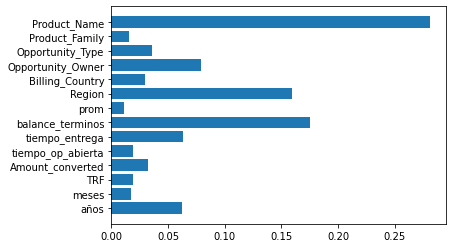

In [ ]:
plt.barh(X_train2.columns, (clf.best_estimator_).feature_importances_)

In [ ]:
df_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [ ]:
df_train2 = pd.read_csv('Train_TP2_Datos_2020-2C.csv')
df_train2 = df_train2[(df_train2.Stage == 'Closed Won') | (df_train2.Stage == 'Closed Lost')]
cambio_binario = {'Closed Lost' : 0, 'Closed Won' : 1}
df_train2['Stage'] = df_train2['Stage'].map(cambio_binario)
df_train2

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,0,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,1,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,1,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,0,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,0,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,1,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Op

In [ ]:
dt=df_train2.groupby('Opportunity_ID').agg({'Pricing, Delivery_Terms_Quote_Appr':'max', 'Pricing, Delivery_Terms_Approved':'max','Stage':'max'})
dt

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Stage
Opportunity_ID,,,
0,1,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
12799,1,1,1
12800,1,0,0
12801,1,1,1


In [ ]:
bc=df_train2.groupby('Opportunity_ID').agg({'Bureaucratic_Code_0_Approval':'max', 'Bureaucratic_Code_0_Approved':'max','Stage':'max'})
bc

,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Stage
Opportunity_ID,,,
0,1,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
12799,0,0,1
12800,0,0,0
12801,1,1,1


In [ ]:
(df_train['Submitted_for_Approval']==0).value_counts()

True    16947
Name: Submitted_for_Approval, dtype: int64

BIEN

In [ ]:
X_train = df_ML_train.drop('Stage',axis=1)
Y_train = df_ML_train['Stage']

In [ ]:
clfs2 = []
seed = 3

clfs2.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))



clfs2.append(("XGBClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs2.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

#clfs.append(("RidgeClassifier", 
#            Pipeline([("Scaler", StandardScaler()),
#                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs2.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs2.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))


scoring = 'neg_log_loss'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs2:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, -cv_results.mean(),  cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogReg: 0.534790 (+/- 0.070552)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBClassifier: 0.861338 (+/- 0.182779)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoostingClassifier: 0.927276 (+/- 0.113203)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BaggingRidgeClassifier: 3.260324 (+/- 1.169071)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ExtraTreesClassifier: 0.945314 (+/- 0.149669)


In [ ]:
parametros = {'n_estimators' : [100, 150, 200, 300, 400], 'min_samples_split' : [2,3,4]}

xg2 = xgb.XGBClassifier()
clf2 = GridSearchCV(xg2, parametros)

In [ ]:
clf2.fit(X = X_train, y = Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True

In [ ]:
pred2 = clf2.predict_proba(df_ML_test.drop(columns='Opportunity_ID'))
predicciones2 = pd.Series(pred2[:,1])
resultados2 = pd.concat([df_ML_test['Opportunity_ID'], predicciones2], axis=1).rename(columns={0: 'Target'})
resultados2.head(10)

,Opportunity_ID,Target
0,10756,0.996766
1,10757,0.992193
2,10758,0.766757
3,10758,0.766757
4,10758,0.766757
5,10758,0.766757
6,10758,0.766757
7,10758,0.766757
8,10758,0.766757
9,10758,0.766757


In [ ]:
res_promedio2 = resultados2.groupby('Opportunity_ID').mean()
res_promedio2.reset_index(inplace=True)
res_promedio2.tail(30)

,Opportunity_ID,Target
1537,12339,0.899140
1538,12340,0.993919
1539,12341,0.990639
1540,12342,0.992608
1541,12343,0.995541
1542,12344,0.997012
1543,12345,0.984154
1544,12346,0.984154
1545,12347,0.984853
1546,12348,0.984154


In [ ]:
((res_promedio2['Opportunity_ID'].value_counts()) > 1).value_counts()


False    1567
Name: Opportunity_ID, dtype: int64

In [ ]:
res_promedio2.drop_duplicates(subset='Opportunity_ID', inplace=True)
res_promedio2.tail(30)

,Opportunity_ID,Target
1537,12339,0.899140
1538,12340,0.993919
1539,12341,0.990639
1540,12342,0.992608
1541,12343,0.995541
1542,12344,0.997012
1543,12345,0.984154
1544,12346,0.984154
1545,12347,0.984853
1546,12348,0.984154


In [ ]:
(res_promedio2['Target']>0.9).value_counts()

True     1397
False     170
Name: Target, dtype: int64

In [ ]:
res_promedio2.to_csv('resultsaa2.csv', index=False)